In [2]:
import pandas as pd
import numpy as np

# Load dataset
df = pd.read_csv('../data/raw/retail_sales.csv')

# Show first 5 rows
df.head()

,YEAR,MONTH,SUPPLIER,ITEM CODE,ITEM DESCRIPTION,ITEM TYPE,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES
0,2020,1,REPUBLIC NATIONAL DISTRIBUTING CO,100009,BOOTLEG RED - 750ML,WINE,0.00,0.0,2.0
1,2020,1,PWSWN INC,100024,MOMENT DE PLAISIR - 750ML,WINE,0.00,1.0,4.0
2,2020,1,RELIABLE CHURCHILL LLLP,1001,S SMITH ORGANIC PEAR CIDER - 18.7OZ,BEER,0.00,0.0,1.0
3,2020,1,LANTERNA DISTRIBUTORS INC,100145,SCHLINK HAUS KABINETT - 750ML,WINE,0.00,0.0,1.0
4,2020,1,DIONYSOS IMPORTS INC,100293,SANTORINI GAVALA WHITE - 750ML,WINE,0.82,0.0,0.0


In [4]:
print("Shape:", df.shape)

Shape: (30000, 9)


In [5]:
print("\nColumns:")
print(df.columns)


Columns:
Index(['YEAR', 'MONTH', 'SUPPLIER', 'ITEM CODE', 'ITEM DESCRIPTION',
       'ITEM TYPE', 'RETAIL SALES', 'RETAIL TRANSFERS', 'WAREHOUSE SALES'],
      dtype='object')


In [6]:
print("\nInfo:")
df.info()


Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   YEAR              30000 non-null  int64  
 1   MONTH             30000 non-null  int64  
 2   SUPPLIER          29967 non-null  object 
 3   ITEM CODE         30000 non-null  object 
 4   ITEM DESCRIPTION  30000 non-null  object 
 5   ITEM TYPE         30000 non-null  object 
 6   RETAIL SALES      29999 non-null  float64
 7   RETAIL TRANSFERS  30000 non-null  float64
 8   WAREHOUSE SALES   30000 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 2.1+ MB


In [7]:
# summary stats
df.describe()

,YEAR,MONTH,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES
count,30000.0,30000.000000,29999.000000,30000.000000,30000.000000
mean,2020.0,3.911467,6.939796,6.594058,27.431031
std,0.0,2.836788,33.081054,27.879428,272.166085
min,2020.0,1.000000,-0.420000,-6.000000,-3999.000000
25%,2020.0,1.000000,0.000000,0.000000,0.000000
50%,2020.0,3.000000,0.160000,0.000000,1.000000
75%,2020.0,7.000000,2.920000,3.000000,6.000000
max,2020.0,9.000000,2739.000000,1507.000000,18317.000000


### STEP 1 — CLEAN DATASET 

In [8]:
# remove duplicates
df = df.drop_duplicates()

In [14]:
# fill missing supplier names
df['SUPPLIER'] = df['SUPPLIER'].fillna("Unknown")

In [16]:
# fill missing retail sales
df['RETAIL SALES'] = df['RETAIL SALES'].fillna(0)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   YEAR              30000 non-null  int64  
 1   MONTH             30000 non-null  int64  
 2   SUPPLIER          30000 non-null  object 
 3   ITEM CODE         30000 non-null  object 
 4   ITEM DESCRIPTION  30000 non-null  object 
 5   ITEM TYPE         30000 non-null  object 
 6   RETAIL SALES      30000 non-null  float64
 7   RETAIL TRANSFERS  30000 non-null  float64
 8   WAREHOUSE SALES   30000 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 2.1+ MB


### STEP 2 — REMOVE NEGATIVE VALUES


In [17]:
df_clean = df[
    (df['RETAIL SALES'] >= 0) &
    (df['RETAIL TRANSFERS'] >= 0) &
    (df['WAREHOUSE SALES'] >= 0)
]

### STEP 3 — CREATE TOTAL SALES COLUMN

In [19]:
df_clean = df[
    (df['RETAIL SALES'] >= 0) &
    (df['RETAIL TRANSFERS'] >= 0) &
    (df['WAREHOUSE SALES'] >= 0)
].copy()

In [20]:
df_clean['TOTAL SALES'] = (
    df_clean['RETAIL SALES'] +
    df_clean['RETAIL TRANSFERS'] +
    df_clean['WAREHOUSE SALES']
)

### STEP 4 — CREATE DATE COLUMN

In [22]:
df_clean['DATE'] = pd.to_datetime(
    df_clean['YEAR'].astype(str) + '-' +
    df_clean['MONTH'].astype(str) + '-01'
)

In [26]:
df_clean.columns

Index(['YEAR', 'MONTH', 'SUPPLIER', 'ITEM CODE', 'ITEM DESCRIPTION',
       'ITEM TYPE', 'RETAIL SALES', 'RETAIL TRANSFERS', 'WAREHOUSE SALES',
       'TOTAL SALES', 'DATE'],
      dtype='object')

### STEP 5 — SAVE CLEAN DATASET

In [27]:
df_clean.to_csv('../data/processed/cleaned_retail_supply.csv', index=False)

### STEP 6 — FIRST ANALYSIS

#### Total Company Sales

In [30]:
df_clean['TOTAL SALES'].sum()

np.float64(1241750.88)

#### Monthly Sales Trend

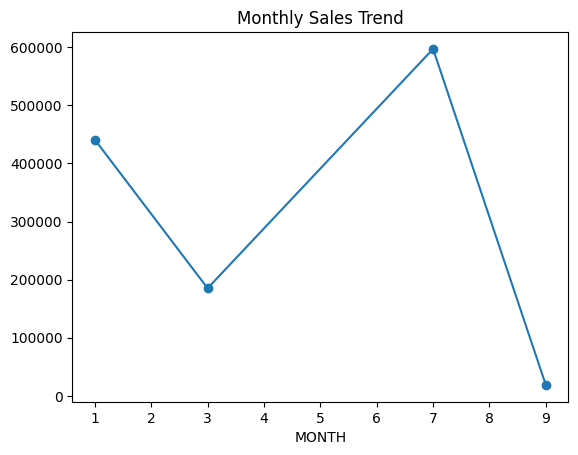

In [31]:
import matplotlib.pyplot as plt

monthly = df_clean.groupby('MONTH')['TOTAL SALES'].sum()

monthly.plot(kind='line', marker='o')
plt.title("Monthly Sales Trend")
plt.show()

#### Top Suppliers

In [32]:
df_clean.groupby('SUPPLIER')['TOTAL SALES'].sum().sort_values(ascending=False).head(10)

SUPPLIER
CROWN IMPORTS               201333.62
ANHEUSER BUSCH INC          159442.66
MILLER BREWING COMPANY      139908.83
HEINEKEN USA                103198.20
DIAGEO NORTH AMERICA INC     47895.05
BOSTON BEER CORPORATION      44512.03
E & J GALLO WINERY           42441.15
CONSTELLATION BRANDS         30591.74
FLYING DOG BREWERY LLLP      21041.50
JIM BEAM BRANDS CO           20243.74
Name: TOTAL SALES, dtype: float64

#### Top Item Types

In [33]:
df_clean.groupby('ITEM TYPE')['TOTAL SALES'].sum().sort_values(ascending=False)

ITEM TYPE
BEER            811864.32
WINE            237783.49
LIQUOR          170141.00
NON-ALCOHOL      12197.12
KEGS              8444.00
STR_SUPPLIES      1240.60
REF                 80.35
Name: TOTAL SALES, dtype: float64

#### Best Selling Products

In [34]:
df_clean.groupby('ITEM DESCRIPTION')['TOTAL SALES'].sum().sort_values(ascending=False).head(10)

ITEM DESCRIPTION
CORONA EXTRA LOOSE NR - 12OZ            49109.50
HEINEKEN LOOSE NR - 12OZ                26792.88
CORONA EXTRA 2/12 NR - 12OZ             21082.50
MODELO ESPECIAL 24 LOOSE NR - 12OZ      20970.00
HEINEKEN 2/12 NR - 12OZ                 15936.40
MILLER LITE 30PK CAN - 12OZ             13459.40
MODELO ESPECIAL SUITCASE CANS - 12OZ    13092.84
CORONA EXTRA 18PK NR - 12OZ             10973.72
CORONA EXTRA 4/6 NR - 12OZ              10380.04
BUD LIGHT 30PK CAN                      10362.97
Name: TOTAL SALES, dtype: float64